# 12-778 Fall 2023: Assignment #2 Solutions

Mario Bergés

## Solutions

Here I provide the solutions to this assignment. Some of the answers can
be wrong, as I am far from infalible. So if you find an error, please
report it to me!

## Electrical Circuit Theory (15%)

### Capacitance (5%):

For a capacitor with capacitance $C$ and voltage $V$, why is the
following equation true?

$$w = C \int_{0}^{V} v dv = \frac{1}{2} C V^2$$

> **Answer**
>
> This equation is describing the energy stored in the capacitor ($w$).
> It is easy to see that, because the charge stored by the capacitor is

### Impedances (5%):

Is the resistor the only elementary circuit element that produces a
voltage drop in a *dc* circuit? Why or why not?

> **Answer**
>
> The voltage across the three fundamental circuit elements are:
>
> -   $v(t) = i(t) R$ for a resistor
>
> -   $v(t) = L \frac{di}{dt}$ for an inductor
>
> -   $v(t) = \frac{1}{C}\int_{t_0}^{t}{i(t) dt} + v(t_0)$ for a
>     capacitor
>
> Each of these values *can* be different from zero depending on $i(t)$.
> If, for example, we assume that $i(t) =$ constant, then the inductor
> has a voltage of zero across it. Similarly, the capacitor would have
> zero voltage across it once completely discharged.

### Frequency Response Functions (5%):

In class, we analyzed a simple circuit with an *ac* voltage source
$v_s=v_i(t)=v_i e^{j\omega t}$ and two impedances in series, $Z_1 = R$
and $Z_2 = \frac{1}{j\omega C}$. We were interested in the voltage drop
across $Z_2$ and by applying KVL found that
$v_o(t) = \frac{1}{1+j\omega RC} v_i e^{j\omega t} = \frac{1-j\omega RC}{1 + (\omega RC)^2} v_i e^{j\omega t}$.
Knowing that we can easily find the magnitude and phase of this complex
periodic signal $v_o(t)$ if we know its real $(Re)$ and imaginary $(Im)$
parts (i.e., $\sqrt{(Re)^2 + (Im)^2}$ and
$\text{tan}^{-1}\frac{(Im)}{(Re)}$) then what are they?

> **Answer**
>
> Multiplying the expression by $\frac{1-j\omega RC}{1-j\omega RC}$ we
> get things nicely sorted into:
>
> $Re = \frac{1}{1+(\omega RC)^2}$
>
> $Im = -\frac{\omega RC}{1+(\omega RC)^2}$

## Signal Conditioning (30%)

### Input signal range (10%)

In class we were trying to sample a signal that had a sinusoidal
component with a frequency that was near 60Hz. Its instantaneous
amplitude varied between 3V and -3V. When doing this we noticed two
problems: (a) if we sampled at a low frequency (e.g., 1Hz) the resulting
(aliased) signal was very low frequency and we could easily attribute
this to the Nyquist-Shannon sampling theorem; and (b) the resulting
signal would contain clusters of zero values repeating periodically. We
had two hypothesis for the underlying cause of this second problem:
saturation or inappropriately configured sampling on the ADC. After
discarding the second hypothesis by using more accurate sampling
methods, we were left with the saturation hypothesis. Upon further
inspection of the resulting signals, we realized that the clusters of
zero values would last for approximately 8 ms, repeat themselves every
16 ms, and occupy the part of the signal that would correspond to the
negative values of the sine function. Thus, the saturation we were
seeing was because the input signals to the ADC were lower than its
minimum input voltage.

One can alleviate this problem by implementing a signal conditioning
circuit that biases the signal to be entirely positive. A relatively
simple circuit that can be used for this purpose would be a voltage
divider. **Please provide a design for such a circuit including the
values of the impedances (resistors in this case), an expression for the
the source and output voltages, and proof that the signal would fall
within the input range for the ADC in the Pico.**

> **Answer**
>
> Something like this:
>
> [A bias voltage interface
> circuit](https://www.circuitlab.com/circuit/2u6k799z929p/bias-voltage-interface/)

### Interstage loading errors (10%)

When conneting different stages of our instrument (e.g., an analog
device to an A/D converter), why is it that for current source inputs,
we want to have $Z_2$ (the impedance of the next stage) be smaller than
that of the source? Can you derive the expression for the loading error
in this case (i.e., $e_I = I_2 - I_1$ where $I_1$ is the current that
would circulate if we short-circuit the terminals of our first device –
the source – and $I_2$ is the current that is pushed through the second
device when connected)? Why is it
$e_I = V_1 \frac{-Z_2}{Z_1^2 + Z_1 Z_2}$?

> **Answer**
>
> $$I_1 = \frac{V_1}{Z_1}$$
>
> $$I_2 = \frac{V_1}{Z_1+Z_2}$$
>
> Thus,
> $e_I = I_2 - I_1 = V_1 \left(\frac{1}{Z_1+Z_2} - \frac{1}{Z_1}\right)$
>
> And $e_I = V_1 \left( \frac{Z_1 - (Z_1 + Z_2)}{Z_1 (Z_1+Z_2)}\right)$
>
> Leading to $e_I = V_1 \frac{-Z_2}{Z_1^2 + Z_1 Z_2}$
>
> Which implies that for that error to be small, we want $Z_2$ to be
> smaller than $Z_1$.

### Wheatstone Bridges (10%)

In class, we saw the derivation of the Wheatstone bridge and showed why
the full-bridge had better properties for strain measurements than other
configurations. We also said (but did not prove) that the half-bridge
configuration was *better* than a voltage divider or the single/quarter
bridge configuration. Here, I’m asking you to prove that.

> **Answer**
>
> Assuming that the four resistors of the bridge are $R_1$, $R_2$, $R_3$
> and $R_4$, then in the quarter bridgecase, we assume $R_1 = R_3 = R_4$
> and $R_2 = R_x$, and the expression for the output voltage $V_o$ is:
>
> $$V_o^{\text{quart}} = V \left(\frac{R_1}{R_x + R_1} - \frac{R_1}{R_1 + R_1}\right) = V \frac{R_1 - R_x}{2(R_x + R_1}$$
>
> For the half bridge, we assume $R_1 = R_3$ and $R_2 = R_4 = R_x$,
> which leads us to:
>
> $$V_o^{\text{half}} = V \left(\frac{R_1}{R_x + R_1} - \frac{R_x}{R_1 + R_x}\right) = V \frac{R_1 - R_x}{(R_x + R_1}$$
>
> As we can see, $V_o^{\text{quart}}$ is half as sensitive to changes in
> $R_x$ as $V_o^{\text{half}}$.

## Signal Characteristics (45%)

### Solve problem 2.4 from Chapter 2 of Figliola (5%)

> **Answer**
>
> ``` python
> from numpy import mean, sqrt, square
>
> y1 = [0, 11.76, 19.02, 19.02, 11.76, 0, -11.76, -19.02, -19.02, -11.76, 0]
> y2 = [0, 15.29, 24.73, 24.73, 15.29, 0, -15.29, -24.73, -24.73, -15.29, 0]
>
> y1_mean = mean(y1)
> y2_mean = mean(y2)
> y1_rms = sqrt(mean(square(y1)))
> y2_rms = sqrt(mean(square(y2)))
>
> print(f'The means are the same: y1_mean = {y1_mean}, y2_mean = {y2_mean} (a very small diference caused by numerical precision). And the RMS values are able to distinguish the signals: y1_rms = {y1_rms}, y2_rms = {y2_rms}.')
> ```
>
>     The means are the same: y1_mean = -4.844609562000683e-16, y2_mean = 3.2297397080004555e-16 (a very small diference caused by numerical precision). And the RMS values are able to distinguish the signals: y1_rms = 13.484779298426531, y2_rms = 17.53289894611115.

### Solve problem 2.7 from Chapter 2 of Figliola (5%)

> **Answer**
>
> As we know, a first order system has a natural (angular) frequencty
> $\omega = \sqrt{\frac{k}{m}}$ where $m$ here is $1$kg and $k$ is
> $5000$ N/cm, or $5\times 10^5$ in units of kg/$m^2$. This leads to
> $\omega = 707.1$. Because this is the angular (or circular) frequency,
> its units are radians per second. To conver this into natural
> frequency $f$, we just divide by $2\pi$ to get $f = 112.5$ Hz.

### Solve problem 2.11 from Chapter 2 of Figliola (10%)

> **Answer**
>
> We know that, in general, for a sum of a sine and a cosine with the
> same period, we can write:
> $B_n sin(\omega t) + A_n cos(\omega t) = C_n cos(\omega t - \phi)$,
> where $\phi = tan^{-1}\left(\frac{B_n}{A_n}\right)$ and
> $C_n = \sqrt{A_n^2 + B_n^2}$, then:
>
> $$y(t) = \sum_{n=1}^\infty\left(\frac{2\pi n}{6} sin(n\pi t) + \frac{4\pi n}{6} cos(n\pi t)\right) = \sum_{n=1}^\infty\left( C_n cos(n\pi t - \phi) \right)$$
> where
> $C_n = \sqrt{\left(\frac{2\pi n}{6}\right)^2 + \left(\frac{4\pi n}{6}\right)^2} = \frac{\sqrt{5}}{3} \pi n$
> and $\phi = tan^{-1}\left({\frac{1}{2}}\right)$
>
> Or more succintly:
>
> $$y(t) = \sum_{n=1}^\infty \frac{\sqrt{5}}{3} \pi n cos\left(n\pi t - tan^{-1}\left(\frac{1}{2}\right)\right)$$

### Solve problem 2.15 from Chapter 2 of Figliola (15%)

> **Answer**
>
> Using the formulas for $A_0$, $A_n$ and $B_n$, and integrating the
> piece-wise function (composed of three parts), we get expressions. For
> the sake of brevity (and to save myself some time writing down LaTeX
> equations here, I’ll just go straight to the answers:
>
> $$A_0 = 0$$ $$A_n = \frac{-2}{\pi n} sin\left(\frac{\pi n}{2}\right)$$
> $$B_n = \frac{2 cos\left(\frac{n \pi}{2}\right) -cos(\pi n) - 1}{\pi n}$$
>
> ``` python
> import numpy as np
> from matplotlib import pyplot as plt
>
> A0 = 0
> A = lambda n: -2/(np.pi * n) * np.sin(np.pi*n/2)
> B = lambda n: (2*np.cos(n/2*np.pi)-np.cos(np.pi * n) - 1)/(np.pi * n)
>
> def y_hat(t,N):
>   res = A0 
>   for n in range(1,N+1):
>     res += A(n) * np.cos(n*t) + B(n) * np.sin(n*t)
>   return res
>
> t = np.linspace(-np.pi, np.pi, 1000)
>
> y1 = np.zeros(500)
> y2 = np.ones(250)*-1
> y3 = np.ones(250)
> y = np.concatenate((y1,y2,y3))
>
> plt.plot(t,y, '--r',label='y(t)')
> plt.plot(t,y_hat(t,3),'-b', label='Approximation of y(t) with 3 partial sums')
> plt.plot(t,y_hat(t,50),'-g', label='Approximation of y(t) with 50 partial sums')
> plt.legend()
> plt.show()
> ```
>
> 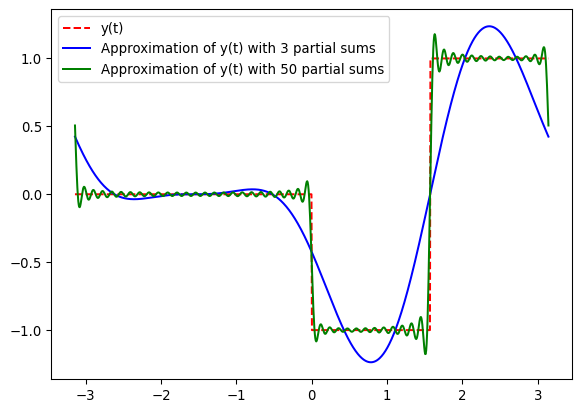

### Solve problem 2.24 from Chapter 2 of Figliola (10%)

> **Answer**
>
> There are many ways to answer this question, so I am just going to
> provide some generic guidance to the answers and avoid sketching the
> signal directly.
>
> ### Output signal from a refrigerator’s thermostat
>
> The thermostat’s output is a binary signal (i.e., *on* or *off*). Over
> time, the value is kept constant until the thermostat requires the
> compressor to be turned *on* or *off*, and that duration is
> proportional to the difference between the refrigerator’s internal
> temperature and the setpoint temperature chosen by the user.
>
> ### Electrical signal to a spark plug in a car engine
>
> Every time the spark plug is needed (during ignition), there would be
> a very short burst (almost like an impulse) sent to it. So the signal
> would be a series of impulses spaced over time.
>
> ### Input to a cruise control system
>
> The cruise control signal would be similar to the thermostat one (i.e,
> it’s the output of a controller) but not binary. Instead it would
> likely track the error between the speed of the car and the desired
> speed chosen by the user and vary over time depending on road
> conditions. A small apmlitude sinusodial signal with changing
> frequency could be used to show this…
>
> ### Pure musical tone
>
> A pure musical tone is composed of a single sine or cosine waveform at
> a specific frequency.
>
> ### The note produced by a guitar string
>
> Multiple harmonics of the fundamental frequency (the pure tone
> corresponding to the note) being played will be present in the
> resulting sound, but otherwise it would be similar to the previous
> one.
>
> ### AM and FM radio signals
>
> Amplitude modulation, as the name implies, is where the information
> that is being transmitted is encoded as a change in amplitude to a
> signal with constant frequency; whereas frequency modulation econdes
> information in changes to the frequency of a signal. Sinusoidal
> signals can be used here and modulated accordingly for each case.

## High-speed sampling (10%)

Find an analog sensor that can be used to measure a physical phenomenon
with interesting dynamic properties (e.g., accelerometer, microphone,
etc.) and, using proper signal conditioning and sampling strategies,
obtain measurements of this phenomenon using the sensor and your
Raspberry Pi Pico at a sampling rate of at least 1000Hz. Compare the
results of the sampling calling the ADC using `machine.ADC.read_u16()`
and using the DMA trick we showed in class. Submit a sketch of the
signal conditioning circuit, the Python code that needs to run on the
Pico, two CSV files showing your sampled signals, and a written
explanation of what you found during the process.

> **Answer**
>
> There is no one answer to this question.